In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

# Display the first few rows
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class
0.0    148350
1.0       285
Name: count, dtype: int64


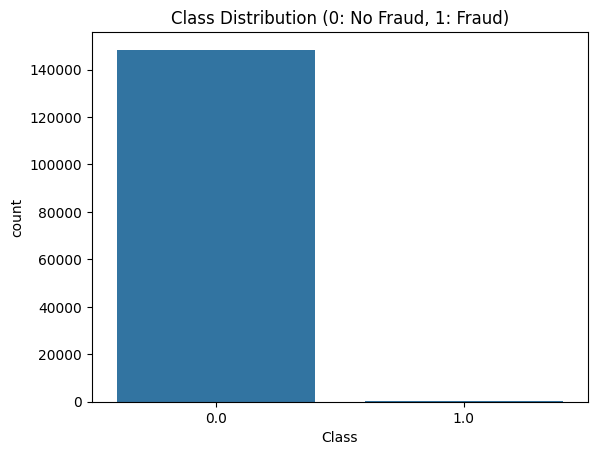

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
print(df['Class'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.show()

print(df.isnull().sum())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df_cleaned = df.dropna(subset=['Class'])

X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

In [ ]:
y = y.fillna(0)

In [ ]:
print(df_cleaned['Class'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
148630    0.0
148631    0.0
148632    0.0
148633    0.0
148634    0.0
Name: Class, Length: 148635, dtype: float64


In [ ]:
# Drop rows with NaN in any feature or the target variable
df_cleaned = df.dropna()

# Re-separate features and target variable
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']


In [ ]:
# Example: If you dropped rows from y
y = y.dropna()

# Synchronize X to match the dropped rows in y
X = X.loc[y.index]


In [ ]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


In [ ]:
print(f"Shape of X after cleaning: {X.shape}")
print(f"Shape of y after cleaning: {y.shape}")


Shape of X after cleaning: (148635, 30)
Shape of y after cleaning: (148635,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9996636054765028
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29670
         1.0       0.96      0.86      0.91        57

    accuracy                           1.00     29727
   macro avg       0.98      0.93      0.95     29727
weighted avg       1.00      1.00      1.00     29727

Confusion Matrix:
 [[29668     2]
 [    8    49]]


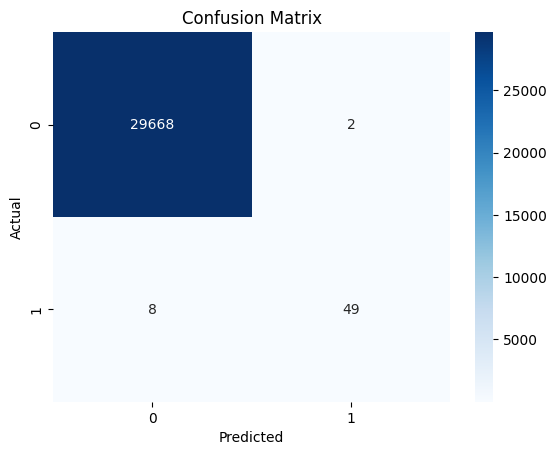

In [ ]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the model again with balanced data
model.fit(X_res, y_res)
y_pred_res = model.predict(X_test)

# Evaluate again
print("Accuracy (After SMOTE):", accuracy_score(y_test, y_pred_res))
print("Classification Report (After SMOTE):\n", classification_report(y_test, y_pred_res))


Accuracy (After SMOTE): 0.9995963265718034
Classification Report (After SMOTE):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29670
         1.0       0.92      0.86      0.89        57

    accuracy                           1.00     29727
   macro avg       0.96      0.93      0.95     29727
weighted avg       1.00      1.00      1.00     29727

